![Logo_Unifor](https://user-images.githubusercontent.com/61051085/81343928-3ce9d500-908c-11ea-9850-0210b4e94ba0.jpg)
# PROJETO 01: Classificador de Grau de Confiabilidade em Tweets 
### Testes de modelos de linguagem tradicionais/neurais com Python 
    Disciplina: D322 - Tópicos Avançados em Processamento de Linguagem Natural | Professora Vládia
    
    Componentes da Equipe:
    Antonio Marcos Aires Barbosa            | Matrícula: 2016397    marcosaires1@gmail.com
    Ana Carla Guimaraes Aragao T Cavalcante | Matrícula: 2016403    carllasiga@gmail.com
    Virginia Madeira Barros de Queiroz      | Matrícula: 2026537    virginiaqueiroz@edu.unifor.br

# Estuturação do trabalho:
    Fase01. Ingestão, Organização, Leitura do corpus em português do Brasil
    Fase02. Pré-processamento dos corpus, com NLTK
    Fase03. Vetorização dos tweets por WordEmbeddings, com Spacy
    Fase04. Treinamento e testes dos modelos classificadores
    Fase05. Geração de N-gramas e extração de features com CountVectorizer
    Fase06. Treino, avaliação e comparação para escolha do classificador
    Fase07. Aplicação do modelo classificador selecionado
    Fase08. Validação da classificação de tweets novos com o modelo escolhido

# Fase01. Ingestão, Organização, Leitura do corpus em português do Brasil

In [1]:
import os
import sys
import re    
import nltk
import emoji
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option('display.max_colwidth', None)
pd.set_option('colheader_justify', 'left')

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Definir um caminho específico na estrutura de diretório
path = "./OneDrive/Documentos/GitHub/PLN_RumorEval_ptbr/datasets"
dirs = os.listdir(path)

# Listar arquivos do caminho específico
for file in dirs:
    print(file)

FakeTweetBr-Test.csv
FakeTweetBr.csv


In [3]:
## lê entrada como um csv separado por tabulações '\t' e armazena em um DataFrame
strFile = path + "/" + "FakeTweetBr.csv"
df00_traintest = pd.read_csv(strFile)
df00_traintest.head(5)

,Unnamed: 0,id,subject,text,classificacao,date,retweets,favorites,permalink
0,0,1.124513e+18,macaco marielle,Marielle >BANDIDOS Narco-traficantes-Milícias pisou na bola PCC >Mandante do crime #Brazão do PT #OrganizaçãoCriminosa Assassinada por THIAGO- MACACO Midia para de acusar quem destruiu a sonhada #GRANDEPATRIA @ECantanhede @CarvalhosaMo @CarlosBolsonaro @RenovMidia @roxmo @SITEFCS pic.twitter.com/8HTb0VVmj8,fake,2019-05-04 0:16,0,0,https://twitter.com/MRTT_/status/1124513050218893312
1,1,1.124049e+18,macaco marielle,"Bem, as últimas noticias a respeito disso que o verdadeiro assassino de Marielle não é aqueles acusados senão um elemento de codinome Macaco "". Ou seja, não colou a relação Bolsonaro x Marielle . Reveja suas fontes.""",fake,2019-05-02 17:33,0,0,https://twitter.com/EvaristoKlebber/status/1124049371006476293
2,5,1.119295e+18,macaco marielle,@jornalnacional convivi com notícias da Marielle durante 3 meses quase todos os dias. Porque pararam as reportagens? Só porque se descobriu que seu matador foi Thiago macaco ? Negro favelado e ligado ao tráfico? Bonemer vc é o supra sumo do ridículo .,fake,2019-04-19 14:41,0,0,https://twitter.com/luiztemper/status/1119295029204398080
3,10,1.114583e+18,macaco marielle,"O Cesari Battisti confessou seus crimes, a esquerda calou; o assassino de MARIELLE foi descoberto, a esquerda se calou e agora o Luladrão confessou, a esquerda meteu a língua onde o macaco meu o caju. Demagogos, hipocritas e fariseus",fake,2019-04-06 14:36,0,0,https://twitter.com/GrimoaldoL/status/1114582545625227333
4,11,1.113246e+18,macaco marielle,[Agência Lupa] Verificamos: É falso que Thiago Macaco foi identificado como assassino de Marielle https:// piaui.folha.uol.com.br/lupa/2019/04/0 1/verificamos-marielle-preso-thiago/ …,true,2019-04-02 22:04,1,0,https://twitter.com/antmarobel/status/1113245911591862272


In [4]:
df00_traintest.drop('subject', axis=1, inplace=True)
df00_traintest.drop('Unnamed: 0', axis=1, inplace=True)
df00_traintest.drop('permalink', axis=1, inplace=True)
df00_traintest.drop('id', axis=1, inplace=True)
df00_traintest.drop('retweets', axis=1, inplace=True)
df00_traintest.drop('favorites', axis=1, inplace=True)
df00_traintest.columns = ['tweet', 'classificacao', 'data']

tweets = df00_traintest['tweet'].values
labels = df00_traintest['classificacao'].values

pd.set_option('display.max_colwidth', None)
pd.set_option('colheader_justify', 'left')

print('---------------------------------------------------------------------------------------------------------------------')
print('Tweets completos:')
print(df00_traintest.shape)

---------------------------------------------------------------------------------------------------------------------
Tweets completos:
(279, 3)


In [5]:
df00_traintest['classificacao'].value_counts()

fake    188
true     91
Name: classificacao, dtype: int64

# Fase02. Pré-processamento dos corpus

In [6]:
# !python -m spacy download pt_core_news_lg

In [7]:
from spacy.lang.pt import Portuguese
from spacy.lang.pt.stop_words import STOP_WORDS

In [8]:
print(STOP_WORDS)

{'portanto', 'dez', 'ele', 'sétima', 'comprido', 'sob', 'tive', 'nesta', 'vossas', 'aquela', 'neste', 'primeiro', 'perto', 'põem', 'partir', 'tipo', 'nada', 'parte', 'onde', 'pontos', 'cedo', 'apenas', 'somos', 'também', 'nunca', 'então', 'faz', 'quinta', 'valor', 'toda', 'ademais', 'fostes', 'meu', 'foi', 'elas', 'isso', 'desse', 'assim', 'próprio', 'coisa', 'isto', 'tal', 'pelas', 'talvez', 'nova', 'ali', 'sabe', 'de', 'iniciar', 'apoio', 'fez', 'estiveram', 'ontem', 'tendes', 'porém', 'esta', 'estado', 'em', 'tão', 'aí', 'nível', 'cá', 'dos', 'oitavo', 'nessa', 'novas', 'maior', 'fazia', 'esteve', 'favor', 'tanto', 'exemplo', 'quarto', 'pode', 'grande', 'faço', 'pois', 'falta', 'fora', 'sua', 'comprida', 'pouca', 'pegar', 'área', 'quinto', 'eu', 'deste', 'vens', 'tua', 'segundo', 'os', 'foram', 'ligado', 'estará', 'das', 'conhecida', 'pela', 'próxima', 'meus', 'segunda', 'sexta', 'teve', 'pôde', 'alguns', 'pouco', 'tente', 'quais', 'essa', 'momento', 'vossa', 'dizem', 'sete', 'minha

In [9]:
from nltk.stem.porter import * 
import re

## Funções usadas para tratamento e limpeza direcionada dos dados de tweets  
lst_simbol = [('.'), ('?'), ('!'), ('%'), ('&'), ('*'), ('('), (')'), ('['), (']'), ('{'), ('}'), ('_'), ('-'), ('+'), ('='),
             ('§'), ('$'), ('º'), ('°'), (':'), (';'), ('>'), ('<'), (','), ('“'), ('\"'), ('/'), ('#'), ('@'), ('-'),
             ('0'),('1'),('2'),('3'),('4'),('5'),('6'),('7'),('8'),('9')]

def remove_simbol(text):     # Função para remover símbolos e números
    temp_text  = [str for str in text]

    simbol_list= [s for s in temp_text if s in lst_simbol] 
#     print('símbolos a remover:', simbol_list,'\n')
    
    clean_text = ''.join([str for str in temp_text if not any(i in str for i in simbol_list)])
    return clean_text

def remove_emoji(text):     # Função para remover emojis
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

In [10]:
%%time
df00_traintest['tweet'].value_counts()
df00_traintest['tweet']      = df00_traintest['tweet'].apply(lambda x: remove_simbol(x))                #rem símbolos da lista
df00_traintest['tweet']      = df00_traintest['tweet'].apply(lambda x: re.sub(' [a-zA-Z]{1,2} ',' ', x))#rem palavras até 2 letras
df00_traintest['tweet']      = df00_traintest['tweet'].apply(lambda x: re.sub('http','', x))            #rem específico
df00_traintest['tweet']      = df00_traintest['tweet'].apply(lambda x: re.sub('www','', x))             #rem específico
df00_traintest['tweet']      = df00_traintest['tweet'].apply(lambda x: re.sub('[0-9]+','', x))          #rem números
df00_traintest['tweet']      = df00_traintest['tweet'].apply(lambda x: re.sub('>',' ', x))              #rem específico
df00_traintest['tweet']      = df00_traintest['tweet'].apply(lambda x: re.sub('-',' ', x))              #rem específico
df00_traintest['tweet']      = df00_traintest['tweet'].apply(lambda x:" ".join(x.split()))     
df00_traintest['tweet_ssw']  = df00_traintest['tweet'].apply(lambda x: x.lower())              #passar a minúsculas
df00_traintest['tweet_ssw']  = df00_traintest['tweet_ssw'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

Wall time: 114 ms


In [11]:
len(df00_traintest['tweet_ssw'])

279

# Fase03. Vetorização dos Tweets por Word Embeddings

In [12]:
# !python -m spacy download pt_core_news_sm
# !python -m spacy download pt_core_news_lg
# ! pip install spacy

In [13]:
import spacy
from spacy.lang.pt import Portuguese
import pt_core_news_lg

nlp = pt_core_news_lg.load()

def vetor(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [14]:
# conversão dos valores de targets em números
import numpy as np
true = 2
dy = []
for k in df00_traintest['classificacao']:
#     print('Estado inicial:',k)
    if k == 'fake':
        true = 0
#         print('Setado para:   ',off,'\n')
        dy.append(true)
    
    elif k == 'true':
        true = 1
#         print('Setado para:   ',off,'\n')
        dy.append(true)
    
    else:
        true= 2

sy = pd.Series(dy)

df01_dados = pd.concat([df00_traintest['tweet_ssw'], sy], axis=1)
df01_dados.columns = ['tweet', 'target']

In [15]:
# Vetorização aplicando a função vetor que utiliza npl do Spacy
df01_dados['vetor'] = df01_dados['tweet'].apply(lambda x: vetor(x))
X = df01_dados['vetor'] #Tweets

from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelBinarizer

binarizador_label = LabelBinarizer()
c = df00_traintest['classificacao']

y = binarizador_label.fit_transform(c)

In [16]:
print(X.dtype, X.shape)
print(y.dtype, y.shape)

object (279,)
int32 (279, 1)


# Fase04. Treinamento e testes dos Modelos Classificadores

In [17]:
# Função de seleção do melhor modelo pelo F1-Score
def classify(ngram,X,y):
    from time import time
    import matplotlib.pyplot as plt
    from sklearn.metrics import ConfusionMatrixDisplay
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    y = scaler.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y) 
    
    maiorF1 = 0
    melhor  = ''
    resultados = []
    
    for key in clf.keys():
        t0 = time()
        clf[key].fit(X_train, np.ravel(y_train, order='C'))
        train_time = time() - t0

        t0 = time()
        y_pred = clf[key].predict(X_test)
        ac = cross_val_score(clf[key], X, y, cv=5)
        f1 = f1_score(y_test, y_pred, average='macro')
        test_time = time() - t0
        print(key, "Train time: %0.3fs, Test time:  %0.3fs" %(train_time,test_time))
        
        if f1>maiorF1:
            melhor = key
            maiorF1 = f1
        
        resultados.append((ngram, key, train_time, test_time, np.round(np.mean(ac),2), np.round(f1,4))) 
#         print(key, 'Precisão: %.2f | F1-score: %.4f' %(np.mean(ac), f1))
       
    df_resultados = pd.DataFrame(resultados)
    df_resultados.columns = ['N-gram','Modelo','Tempo Treino','Tempo Teste','Precisão','F1-Score']
    
    print('-'*43)
    print('Melhor modelo:', melhor,'| Maior F1-score: %.4f' %(maiorF1))
    print('-'*43)
          
    ## Plotagem do Gráfico Comparativo
    import matplotlib.pyplot as plt
    indices = np.arange(len(resultados))

    resultados = [[x[i] for x in resultados] for i in range(6)]

    ngram, modelos, train_time, test_time, ac, score = resultados

    plt.figure(figsize=(12, 8))
    plt.title("Score")
#     plt.barh(indices, train_time, .2, label="train_time", color='navy')
#     plt.barh(indices, test_time, .2, label="test_time", color='navy')
    plt.barh(indices + .3, ac, .2, label="precisão", color='c')
    plt.barh(indices + .6, score, .2, label="F1-score", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, modelos):
        plt.text(-.1, i, c)

    plt.show()
    
    return df_resultados

# Fase05. Geração de N-gramas e extração de features com CountVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.preprocessing import MinMaxScaler

In [19]:
unigrama= CountVectorizer()

VOCABULARIO_TWEETS = unigrama.fit(df01_dados['tweet']).vocabulary_
text = unigrama.transform(df01_dados['tweet'])                        #guarda BOW em text

unigram_bow = pd.DataFrame(text.toarray(), columns=unigrama.get_feature_names())
unigram_bow

,abaixo,abandonados,abençoam,abin,aborto,abril,abrile,abstraiam,absurdo,abutres,...,zuvic,zé,áfrica,ángel,época,ídolo,óbito,ódio,ótima,últimas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
unigrama1= CountVectorizer(max_features=221)

VOCABULARIO_TWEETS = unigrama1.fit(df01_dados['tweet']).vocabulary_
text = unigrama1.transform(df01_dados['tweet'])                        #guarda BOW em text

unigram1_bow = pd.DataFrame(text.toarray(), columns=unigrama1.get_feature_names())
unigram1_bow

,agência,ajudar,alguém,almoço,alves,américa,ano,apache,aranto,assassinada,...,vejam,venezuelano,verdade,verificamos,vermelha,vermes,via,vídeo,vítimas,wyllys
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
277,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
bigrama = CountVectorizer(ngram_range=(2,2))
VOCABULARIO_TWEETS = bigrama.fit(df01_dados['tweet']).vocabulary_
text = bigrama.transform(df01_dados['tweet']) #guarda BOW em text
bigram_bow = pd.DataFrame(text.toarray(), columns=bigrama.get_feature_names())
bigram_bow

,abaixo detalhes,abandonados própria,abençoam israel,abin lançou,abin pronunciar,aborto pedindo,abril stf,abrile solto,abstraiam erros,absurdo acontecendo,...,zuvic pai,zé dirceu,áfrica aranto,ángel zuvic,época sabiam,ídolo preso,óbito saiba,ódio stf,ótima curar,últimas noticias
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
trigrama = CountVectorizer(ngram_range=(3,3))
VOCABULARIO_TWEETS = trigrama.fit(df01_dados['tweet']).vocabulary_
text = trigrama.transform(df01_dados['tweet']) #guarda BOW em text
trigram_bow = pd.DataFrame(text.toarray(), columns=trigrama.get_feature_names())
trigram_bow

,abaixo detalhes compartilhem,abandonados própria sorte,abençoam israel benção,abin lançou nota,abin pronunciar respeito,aborto pedindo dinheirocantor,abril stf resolveu,abrile solto vamos,abstraiam erros português,absurdo ministra cármen,...,zuvic pai política,zé dirceu receber,áfrica aranto trazido,ángel zuvic esposa,época sabiam benefícios,ídolo preso dela,óbito saiba boatosorgsaudeplantaa,ódio stf jugar,ótima curar doenças,últimas noticias respeito
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Fase06. Treino, avaliação e comparação para escolha do Classificador

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import warnings

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore")

In [24]:
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
gnb = GaussianNB()
lgr = LogisticRegression(random_state=42, max_iter=2000)
lcv = LogisticRegressionCV(cv=5, random_state=None)
rdc = RidgeClassifier()
rcv = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=2000, tol=1e-3))
lsv = LinearSVC(random_state=42, max_iter=2000)
svm = SVC(random_state=42, max_iter=2000)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=2000)
knn = KNeighborsClassifier(n_neighbors=20)
dmm = DummyClassifier()
rdg = RidgeClassifier()
ada = AdaBoostClassifier()                  
per = Perceptron(tol=1e-3, random_state=0) 

clf = {'PAC': pac, 'GNB': gnb, 'LGR': lgr, 'LCV': lcv, 'RDC': rdc, 'RCV': rcv, 'SGD': sgd, 'LSV': lsv, 'SVM': svm, 'RFC': rfc, 
       'KNN': knn, 'DMM':dmm, 'RDG':rdg, 'ADA':ada, 'PER': per}
clf.keys()

dict_keys(['PAC', 'GNB', 'LGR', 'LCV', 'RDC', 'RCV', 'SGD', 'LSV', 'SVM', 'RFC', 'KNN', 'DMM', 'RDG', 'ADA', 'PER'])

### Avaliação de classificadores em Unigramas, Bigramas e Trigramas

In [25]:
# Função de aplicação do melhor modelo escolhido
def choose(ngram,model,X,y):
    from time import time
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import ConfusionMatrixDisplay
#     from sklearn.metrics import plot_confusion_matrix
        
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    y = scaler.fit_transform(y)  # precisa receber um array
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y) 
    
    resultados = []
    target_names = ['Fake','True']

    t0 = time()
    clf[model].fit(X_train, y_train)
    train_time = time() - t0

    t0 = time()
    y_pred = clf[model].predict(X_test)
    ac = cross_val_score(clf[model], X, y, cv=5)
    f1 = f1_score(y_test, y_pred, average='macro')
    test_time = time() - t0

    resultados.append((ngram, model, train_time, test_time, np.round(np.mean(ac),2), np.round(f1,4)))

#         print(key, 'Precisão: %.2f | F1-score: %.4f' %(np.mean(ac), f1))
       
    df_resultados = pd.DataFrame(resultados)
    df_resultados.columns = ['N-gram','Modelo','Tempo Treino','Tempo Teste','Precisão','F1-Score']
    
    score = accuracy_score(y_test, y_pred)
    clf_descr = str(clf[model]).split('(')[0]
    clf_descr = clf_descr.replace('{','')
    clf_descr = clf_descr.replace('\'','')
    
    n = 90
    print('-'*n)
    print(clf_descr)
    print("Train time: %0.3fs | Test time:  %0.3fs | Acurácia: %0.3f " %(train_time,test_time, score))
    print('-'*n)
    print(classification_report(y_test, y_pred,target_names=target_names))
    print('-'*n)
    
    #Plotagem de matriz de confusão
    print("Matriz de Confusão:")

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    fig.subplots_adjust(wspace=0.1)
    
    cm1 = confusion_matrix(y_test, y_pred)
    cm_display1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=target_names)
    cm_display1 = cm_display1.plot(include_values=True, cmap=plt.cm.YlGn, ax=ax1, xticks_rotation='horizontal')  
    
    cm2 = confusion_matrix(y_test, y_pred, normalize='true')
    cm_display2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=target_names)
    cm_display2 = cm_display2.plot(include_values=True, cmap=plt.cm.YlGn, ax=ax2, xticks_rotation='horizontal')

    plt.show()  # doctest: +SKIP
    
    print('-'*n)    
    return  

PAC Train time: 0.013s, Test time:  0.072s
GNB Train time: 0.006s, Test time:  0.045s
LGR Train time: 0.012s, Test time:  0.073s
LCV Train time: 0.324s, Test time:  1.839s
RDC Train time: 0.009s, Test time:  0.053s
RCV Train time: 0.029s, Test time:  0.161s
SGD Train time: 0.013s, Test time:  0.079s
LSV Train time: 0.003s, Test time:  0.029s
SVM Train time: 0.110s, Test time:  0.710s
RFC Train time: 2.647s, Test time:  10.717s
KNN Train time: 0.033s, Test time:  0.367s
DMM Train time: 0.001s, Test time:  0.009s
RDG Train time: 0.009s, Test time:  0.056s
ADA Train time: 0.288s, Test time:  1.482s
PER Train time: 0.007s, Test time:  0.043s
-------------------------------------------
Melhor modelo: PER | Maior F1-score: 0.8587
-------------------------------------------


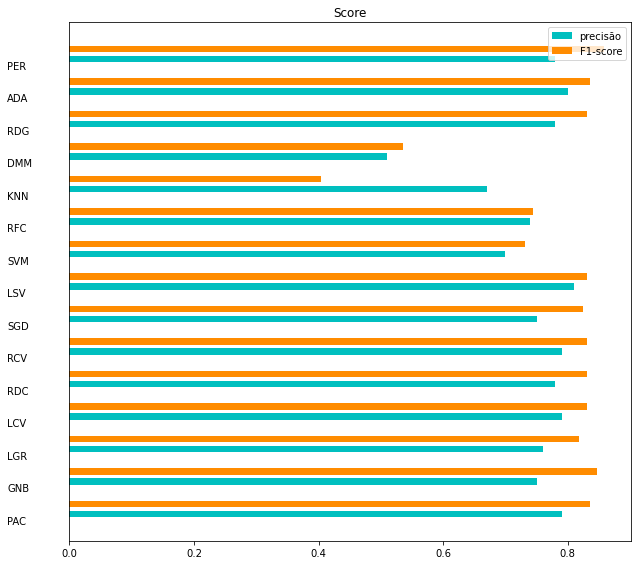

,N-gram,Modelo,Tempo Treino,Tempo Teste,Precisão,F1-Score
0,Unigrama,PAC,0.012973,0.072308,0.79,0.8363
1,Unigrama,GNB,0.006004,0.044997,0.75,0.8476
2,Unigrama,LGR,0.011975,0.072982,0.76,0.8179
3,Unigrama,LCV,0.324000,1.838763,0.79,0.8311
4,Unigrama,RDC,0.009001,0.053000,0.78,0.8311
5,Unigrama,RCV,0.028974,0.161000,0.79,0.8311
6,Unigrama,SGD,0.013001,0.079025,0.75,0.8250
7,Unigrama,LSV,0.003000,0.029001,0.81,0.8311
8,Unigrama,SVM,0.109999,0.710002,0.70,0.7316
9,Unigrama,RFC,2.646860,10.716691,0.74,0.7441


In [26]:
## Performance com Unigramas, sem limite de features
%%time
classify('Unigrama',unigram_bow, y)

------------------------------------------------------------------------------------------
Perceptron
Train time: 0.008s | Test time:  0.044s | Acurácia: 0.875 
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        Fake       0.92      0.89      0.91        38
        True       0.79      0.83      0.81        18

    accuracy                           0.88        56
   macro avg       0.85      0.86      0.86        56
weighted avg       0.88      0.88      0.88        56

------------------------------------------------------------------------------------------
Matriz de Confusão:


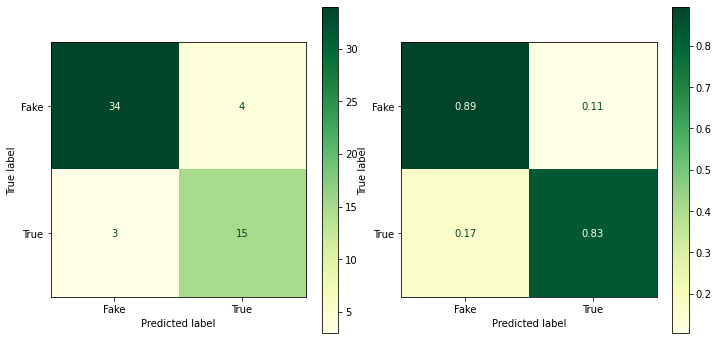

------------------------------------------------------------------------------------------


In [27]:
## Matriz de Confusão de WordEmbeedings de Unigramas sem limite de features
choose('Unigrama', 'PER', unigram_bow, y)

PAC Train time: 0.004s, Test time:  0.026s
GNB Train time: 0.001s, Test time:  0.008s
LGR Train time: 0.009s, Test time:  0.035s
LCV Train time: 0.344s, Test time:  1.650s
RDC Train time: 0.004s, Test time:  0.022s
RCV Train time: 0.024s, Test time:  0.111s
SGD Train time: 0.003s, Test time:  0.018s
LSV Train time: 0.002s, Test time:  0.011s
SVM Train time: 0.013s, Test time:  0.081s
RFC Train time: 2.519s, Test time:  8.960s
KNN Train time: 0.004s, Test time:  0.059s
DMM Train time: 0.000s, Test time:  0.004s
RDG Train time: 0.004s, Test time:  0.022s
ADA Train time: 0.070s, Test time:  0.412s
PER Train time: 0.002s, Test time:  0.013s
-------------------------------------------
Melhor modelo: ADA | Maior F1-score: 0.8772
-------------------------------------------


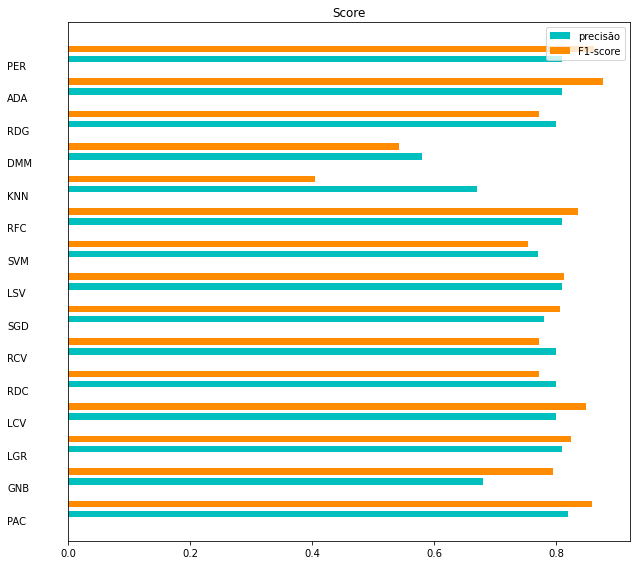

,N-gram,Modelo,Tempo Treino,Tempo Teste,Precisão,F1-Score
0,Unigrama,PAC,0.004004,0.025995,0.82,0.8587
1,Unigrama,GNB,0.001025,0.008000,0.68,0.7957
2,Unigrama,LGR,0.009073,0.034838,0.81,0.8250
3,Unigrama,LCV,0.344000,1.650000,0.80,0.8496
4,Unigrama,RDC,0.004001,0.022000,0.80,0.7714
5,Unigrama,RCV,0.023998,0.111002,0.80,0.7714
6,Unigrama,SGD,0.003025,0.018000,0.78,0.8067
7,Unigrama,LSV,0.001975,0.011000,0.81,0.8130
8,Unigrama,SVM,0.013025,0.080998,0.77,0.7547
9,Unigrama,RFC,2.519235,8.960201,0.81,0.8363


In [28]:
## Performance com Unigramas, com limite de features em 227
%%time
classify('Unigrama',unigram1_bow, y)

------------------------------------------------------------------------------------------
AdaBoostClassifier
Train time: 0.077s | Test time:  0.428s | Acurácia: 0.893 
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        Fake       0.92      0.92      0.92        38
        True       0.83      0.83      0.83        18

    accuracy                           0.89        56
   macro avg       0.88      0.88      0.88        56
weighted avg       0.89      0.89      0.89        56

------------------------------------------------------------------------------------------
Matriz de Confusão:


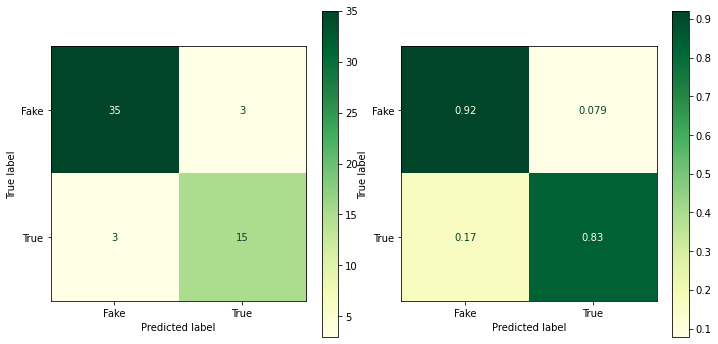

------------------------------------------------------------------------------------------


In [29]:
## Matriz de Confusão de WordEmbeedings de Unigramas sem limite de features com limite de 227 features
choose('Unigrama', 'ADA', unigram1_bow, y)

PAC Train time: 0.020s, Test time:  0.111s
GNB Train time: 0.010s, Test time:  0.080s
LGR Train time: 0.016s, Test time:  0.089s
LCV Train time: 0.475s, Test time:  2.504s
RDC Train time: 0.014s, Test time:  0.081s
RCV Train time: 0.036s, Test time:  0.194s
SGD Train time: 0.021s, Test time:  0.131s
LSV Train time: 0.004s, Test time:  0.043s
SVM Train time: 0.179s, Test time:  1.204s
RFC Train time: 2.772s, Test time:  11.865s
KNN Train time: 0.048s, Test time:  0.601s
DMM Train time: 0.000s, Test time:  0.019s
RDG Train time: 0.013s, Test time:  0.078s
ADA Train time: 0.422s, Test time:  2.204s
NEA Train time: 0.003s, Test time:  0.034s
PER Train time: 0.012s, Test time:  0.062s
-------------------------------------------
Melhor modelo: PER | Maior F1-score: 0.8250
-------------------------------------------


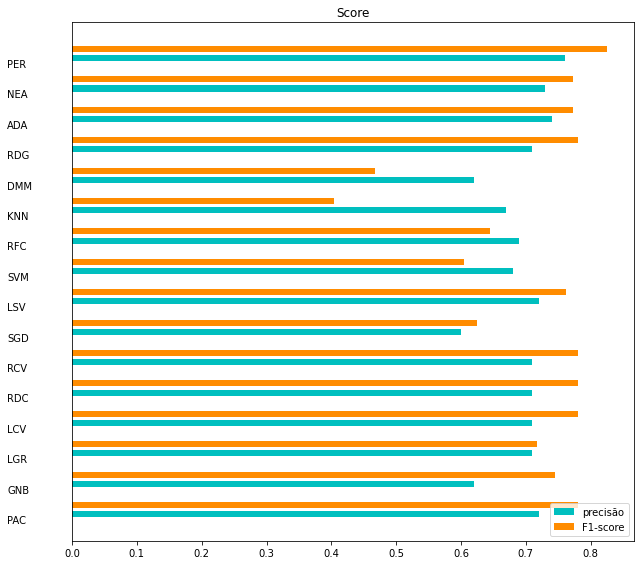

,N-gram,Modelo,Tempo Treino,Tempo Teste,Precisão,F1-Score
0,Bigrama,PAC,0.020000,0.110739,0.72,0.7804
1,Bigrama,GNB,0.010001,0.079999,0.62,0.7448
2,Bigrama,LGR,0.016002,0.089003,0.71,0.7168
3,Bigrama,LCV,0.474996,2.504000,0.71,0.7804
4,Bigrama,RDC,0.013999,0.081001,0.71,0.7804
5,Bigrama,RCV,0.036001,0.193998,0.71,0.7804
6,Bigrama,SGD,0.021001,0.130690,0.60,0.6249
7,Bigrama,LSV,0.004030,0.042976,0.72,0.7619
8,Bigrama,SVM,0.179000,1.204024,0.68,0.6040
9,Bigrama,RFC,2.771979,11.864826,0.69,0.6444


In [26]:
## Performance com Bigramas
%%time
classify('Bigrama',bigram_bow, y)

------------------------------------------------------------------------------------------
Perceptron
Train time: 0.011s | Test time:  0.066s | Acurácia: 0.875 
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        Fake       0.88      0.95      0.91        38
        True       0.87      0.72      0.79        18

    accuracy                           0.88        56
   macro avg       0.87      0.83      0.85        56
weighted avg       0.87      0.88      0.87        56

------------------------------------------------------------------------------------------
Matriz de Confusão:


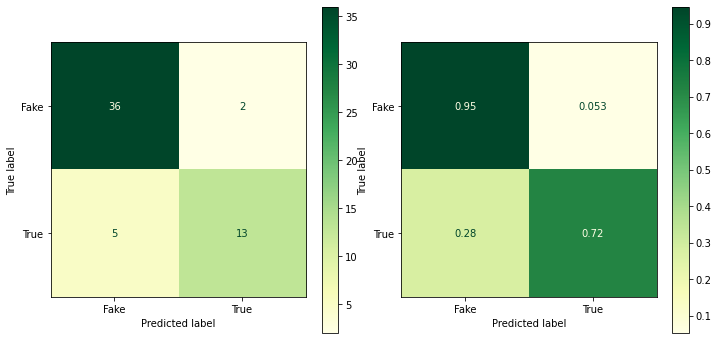

------------------------------------------------------------------------------------------


In [31]:
choose('Bigrama', 'PER', bigram_bow, y)

PAC Train time: 0.020s, Test time:  0.115s
GNB Train time: 0.010s, Test time:  0.092s
LGR Train time: 0.015s, Test time:  0.092s
LCV Train time: 0.473s, Test time:  2.491s
RDC Train time: 0.014s, Test time:  0.088s
RCV Train time: 0.041s, Test time:  0.219s
SGD Train time: 0.021s, Test time:  0.150s
LSV Train time: 0.005s, Test time:  0.046s
SVM Train time: 0.191s, Test time:  1.279s
RFC Train time: 3.007s, Test time:  13.227s
KNN Train time: 0.057s, Test time:  0.651s
DMM Train time: 0.000s, Test time:  0.017s
RDG Train time: 0.015s, Test time:  0.087s
ADA Train time: 0.448s, Test time:  2.370s
NEA Train time: 0.004s, Test time:  0.037s
PER Train time: 0.009s, Test time:  0.066s
-------------------------------------------
Melhor modelo: ADA | Maior F1-score: 0.7906
-------------------------------------------


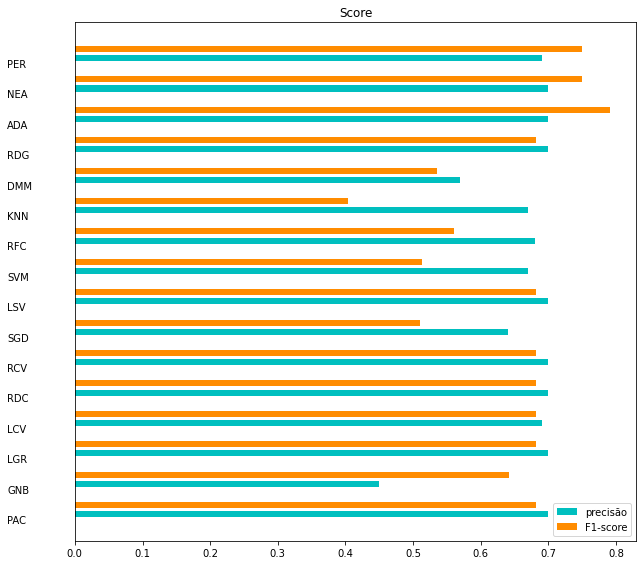

,N-gram,Modelo,Tempo Treino,Tempo Teste,Precisão,F1-Score
0,Trigrama,PAC,0.019999,0.115002,0.70,0.6818
1,Trigrama,GNB,0.010002,0.091998,0.45,0.6424
2,Trigrama,LGR,0.015001,0.092033,0.70,0.6818
3,Trigrama,LCV,0.473003,2.491025,0.69,0.6818
4,Trigrama,RDC,0.013999,0.087999,0.70,0.6818
5,Trigrama,RCV,0.040975,0.218999,0.70,0.6818
6,Trigrama,SGD,0.021000,0.150497,0.64,0.5102
7,Trigrama,LSV,0.004976,0.046025,0.70,0.6818
8,Trigrama,SVM,0.191002,1.278999,0.67,0.5130
9,Trigrama,RFC,3.006940,13.227333,0.68,0.5604


In [29]:
## Performance com Trigramas
%%time
classify('Trigrama',trigram_bow, y)

------------------------------------------------------------------------------------------
AdaBoostClassifier
Train time: 0.426s | Test time:  2.287s | Acurácia: 0.821 
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        Fake       0.80      0.97      0.88        38
        True       0.90      0.50      0.64        18

    accuracy                           0.82        56
   macro avg       0.85      0.74      0.76        56
weighted avg       0.84      0.82      0.80        56

------------------------------------------------------------------------------------------
Matriz de Confusão:


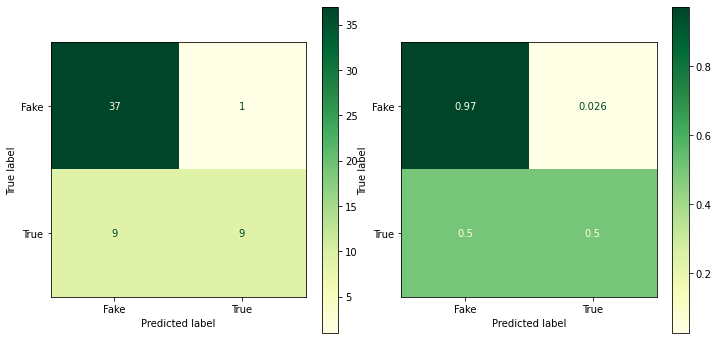

------------------------------------------------------------------------------------------


In [33]:
choose('Trigrama', 'ADA', trigram_bow, y)

# Resultado da escolha de modelo classificador:

### Conforme as análises entre os modelos e WordEmbeedings de n-gramas, o modelo escolhido foi o ADABoostClassifier com Unigramas, que apresentou acurária de classificação aproximadamente de 89%.
### Obteve-se F1-score de 87,72%, precisão de 92% em tweets fakes, e de 83% para classe de tweets sem fakes.

# Fase07. Aplicação do Modelo Classificador selecionado

In [57]:
# Vetorização aplicando a função vetor que utiliza npl do Spacy
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelBinarizer

df01_dados['vetor'] = df01_dados['tweet'].apply(lambda x: vetor(x))
X = df01_dados['vetor'] #Tweets

binarizador_label = LabelBinarizer()
c = df00_traintest['classificacao']

y = binarizador_label.fit_transform(c)

In [58]:
print(X.shape)
print(y.shape)

(279,)
(279, 1)


In [59]:
# Normalização dos valores de vetores
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(unigram1_bow)
y = scaler.fit_transform(y)  # precisa receber um array

In [60]:
print(X.shape)
print(y.shape)

(279, 221)
(279, 1)


In [61]:
# Divisão dos conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y) 

resultados = []
target_names = ['Fake','True']

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

AdaBoostClassifier()

Matriz de Confusão:


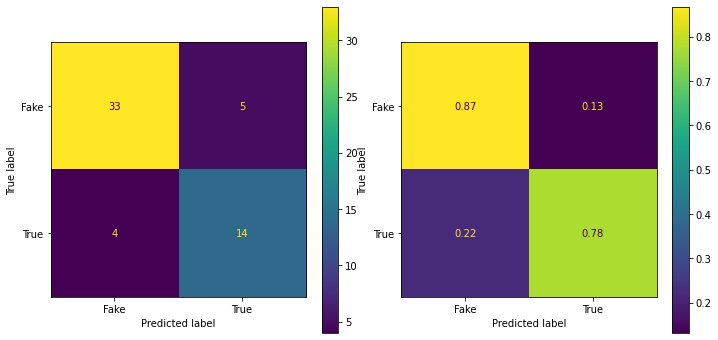

------------------------------------------------------------------------------------------
AdaBoostClassifier
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        Fake       0.89      0.87      0.88        38
        True       0.74      0.78      0.76        18

    accuracy                           0.84        56
   macro avg       0.81      0.82      0.82        56
weighted avg       0.84      0.84      0.84        56

------------------------------------------------------------------------------------------


In [90]:
# Matriz de Confusão com valores absolutos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
ac = cross_val_score(clf, X, y, cv=5)
f1 = f1_score(y_test, y_pred, average='macro')

print("Matriz de Confusão:")
target_names = ['Fake','True']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig.subplots_adjust(wspace=0.1)

cm1 = confusion_matrix(y_test, y_pred, )
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=target_names)
cm_display1 = cm_display1.plot(include_values=True, ax=ax1, xticks_rotation='horizontal')  

cm2 = confusion_matrix(y_test, y_pred, normalize='true')
cm_display2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=target_names)
cm_display2 = cm_display2.plot(include_values=True, ax=ax2, xticks_rotation='horizontal')

plt.show()  # doctest: +SKIP

score = accuracy_score(y_test, y_pred)
clf_descr = str(clf).split('(')[0]
clf_descr = clf_descr.replace('{','')
clf_descr = clf_descr.replace('\'','')

n = 90
print('-'*n)
print(clf_descr)
print('-'*n)
print(classification_report(y_test, y_pred, target_names=target_names))
print('-'*n)

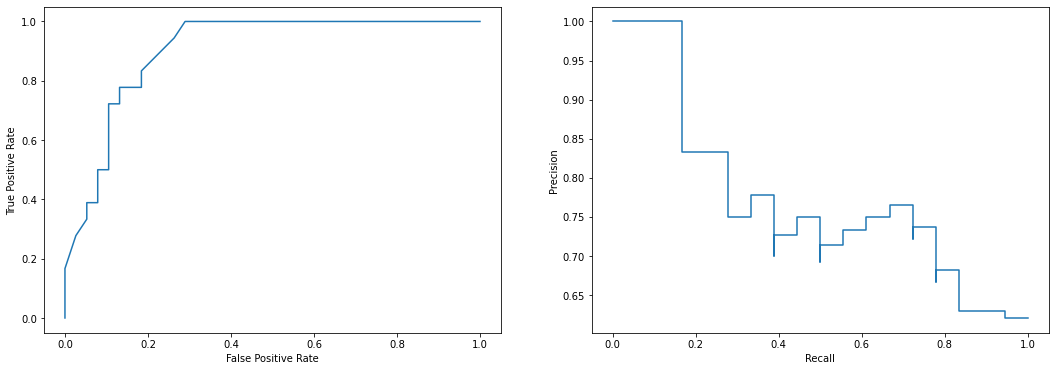

In [77]:
# Avaliação do Overfitting
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

# Fase08. Classificando Tweets novos com o modelo escolhido

In [78]:
# predição de dados novos
# Definir um caminho específico na estrutura de diretório
path = "./OneDrive/Documentos/GitHub/PLN_RumorEval_ptbr/datasets"
dirs = os.listdir(path)

# Listar arquivos do caminho específico
for file in dirs:
    print(file)

FakeTweetBr-Test.csv
FakeTweetBr.csv


In [79]:
## lê entrada como um csv e armazena em um DataFrame
strFile = path + "/" + "FakeTweetBr-Test.csv"
df02_pred = pd.read_csv(strFile)
df02_pred.shape

(20, 9)

In [80]:
%%time
df02_pred['text'].value_counts()
df02_pred['text']      = df02_pred['text'].apply(lambda x: remove_simbol(x))
df02_pred['text']      = df02_pred['text'].apply(lambda x: re.sub(' [a-zA-Z]{1,2} ',' ', x))#rem palavras até 2 letras
df02_pred['text']      = df02_pred['text'].apply(lambda x: re.sub('http','', x))            #rem específico
df02_pred['text']      = df02_pred['text'].apply(lambda x: re.sub('www','', x))             #rem específico
df02_pred['text']      = df02_pred['text'].apply(lambda x: re.sub('[0-9]+','', x))
df02_pred['text']      = df02_pred['text'].apply(lambda x: re.sub('>',' ', x))
df02_pred['text']      = df02_pred['text'].apply(lambda x: re.sub('-',' ', x))
df02_pred['text']      = df02_pred['text'].apply(lambda x:" ".join(x.split()))
df02_pred['tweet_ssw']  = df02_pred['text'].apply(lambda x: x.lower())
df02_pred['tweet_ssw']  = df00_traintest['tweet_ssw'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

Wall time: 15 ms


In [81]:
# Vetorização aplicando a função vetor que utiliza npl do Spacy
df02_pred['vetor'] = df02_pred['tweet_ssw'].apply(lambda x: vetor(x))
X_valid = df02_pred['vetor'] #Tweets

from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelBinarizer

binarizador_label = LabelBinarizer()
c = df02_pred['classificacao']

y_valid = binarizador_label.fit_transform(c)

In [82]:
print(X_valid.shape)
print(y_valid.shape)

(20,)
(20, 1)


In [91]:
unigrama_valid = CountVectorizer()
VOCABULARIO_TWEETS = unigrama_valid.fit(df02_pred['tweet_ssw']).vocabulary_
text_valid = unigrama_valid.transform(df02_pred['tweet_ssw'])                        #guarda BOW em text
unigram_bow_valid = pd.DataFrame(text_valid.toarray(), columns=unigrama_valid.get_feature_names())

In [84]:
print(unigram_bow_valid.shape)
print(y_valid.shape)

(20, 221)
(20, 1)


Matriz de Confusão:


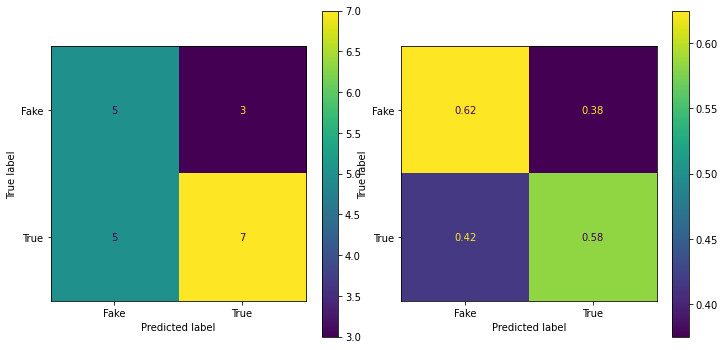

------------------------------------------------------------------------------------------
AdaBoostClassifier
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        Fake       0.50      0.62      0.56         8
        True       0.70      0.58      0.64        12

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.62      0.60      0.60        20

------------------------------------------------------------------------------------------


In [89]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_valid = scaler.fit_transform(unigram_bow_valid)
y_valid = scaler.fit_transform(y_valid)  # precisa receber um array

y_pred = clf.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
ac = cross_val_score(clf, X_valid, y_valid, cv=5)
f1 = f1_score(y_valid, y_pred, average='macro')

print("Matriz de Confusão:")
target_names = ['Fake','True']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig.subplots_adjust(wspace=0.1)

cm1 = confusion_matrix(y_valid, y_pred, )
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=target_names)
cm_display1 = cm_display1.plot(include_values=True, ax=ax1, xticks_rotation='horizontal')  

cm2 = confusion_matrix(y_valid, y_pred, normalize='true')
cm_display2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=target_names)
cm_display2 = cm_display2.plot(include_values=True, ax=ax2, xticks_rotation='horizontal')

plt.show()  # doctest: +SKIP

score = accuracy_score(y_valid, y_pred)
clf_descr = str(clf).split('(')[0]
clf_descr = clf_descr.replace('{','')
clf_descr = clf_descr.replace('\'','')

n = 90
print('-'*n)
print(clf_descr)
print('-'*n)
print(classification_report(y_valid, y_pred, target_names=target_names))
print('-'*n)